In [195]:
#data libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [197]:
%matplotlib inline

In [296]:
#Reading training data
titanic_train = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\train.csv')

#Reading test data
titanic_test = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\test.csv')

In [297]:
# Train set
titanic_train = titanic_train.drop(["PassengerId", "Ticket"], axis=1)

# For submission
submission = pd.DataFrame(columns=["PassengerId", "Survived"])
submission["PassengerId"] = titanic_test["PassengerId"]

# Test set
titanic_test = titanic_test.drop(["PassengerId", "Ticket"], axis=1)

In [298]:
#function to extract title
def extract_title(name) :
    string = name.split(',')[1].split(' ')[1]
    if '.' in string :
        return string[:-1]
    else :
        return string
    
#function to map other titles to standard title
def get_title(title, sex) :
    
    if title not in ['Mr', 'Mrs', 'Master', 'Miss'] :
        
        if title == 'the' :
            #The Countess implies we can use Mrs can be used
            return 'Mrs'
        elif title == 'Jonkheer':
            #The Jonkheer implies we can use Mr can be used
            return 'Mr'
        elif title == 'Mlle':
            return 'Miss'
        elif title == 'Ms':
            return 'Miss'
        elif title == 'Lady':
            return 'Mrs'
        else :
            if sex == 'male' :
                return 'Mr'
            else :
                return 'Mrs'
    else:
        return title
        
#impute age from title
def get_age(age, title) :
    
    if age != age :
        if title == 'Master' :
            return 5.00
        elif title == 'Miss'  :
            return 22.00
        elif title == 'Mr' :
            return 33.00
        else:
            return 36.00
    else :
        return age

In [299]:
titanic_train['Title'] = titanic_train['Name'].apply(extract_title)
titanic_test['Title'] = titanic_test['Name'].apply(extract_title)

In [300]:
titanic_train['Title'] = titanic_train.apply(lambda x : get_title(x.Title, x.Sex), axis=1)
titanic_test['Title'] = titanic_test.apply(lambda x : get_title(x.Title, x.Sex), axis=1)

In [301]:
titanic_train['Age'] = titanic_train.apply(lambda x : get_age(x.Age, x.Title), axis=1)
titanic_test['Age'] = titanic_test.apply(lambda x : get_age(x.Age, x.Title), axis=1)

In [302]:
titanic_test.loc[152, 'Fare'] = 14.644

In [303]:
titanic_train.loc[61, 'Embarked'] = 'S'
titanic_train.loc[829, 'Embarked'] = 'S'

In [304]:
titanic_train['Name_Title'] = titanic_train['Name'].apply(len)
titanic_test['Name_Title'] = titanic_test['Name'].apply(len)

In [305]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Name_Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr,23
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,51
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss,22


In [306]:
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_test['Family'] = titanic_test['SibSp'] + titanic_train['Parch']

In [307]:
titanic_train['Alone'] = titanic_train['Family'].apply(lambda x : 'Yes' if x == 0 else 'No')
titanic_test['Alone'] = titanic_test['Family'].apply(lambda x : 'Yes' if x == 0 else 'No')

In [308]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Name_Title,Family,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr,23,1,No
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,51,1,No
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss,22,0,Yes


In [309]:
titanic_train['have_SibSp'] = titanic_train['SibSp'].apply(lambda x : 'Yes' if x > 0 else 'No')
titanic_test['have_SibSp'] = titanic_test['SibSp'].apply(lambda x : 'Yes' if x > 0 else 'No')

In [310]:
titanic_train['have_Parch'] = titanic_train['Parch'].apply(lambda x : 'Yes' if x > 0 else 'No')
titanic_test['have_Parch'] = titanic_test['Parch'].apply(lambda x : 'Yes' if x > 0 else 'No')

In [311]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Name_Title,Family,Alone,have_SibSp,have_Parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr,23,1,No,Yes,No
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,51,1,No,Yes,No
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss,22,0,Yes,No,No


In [312]:
titanic_train['Family_Name'] = titanic_train['Name'].apply(lambda x : x.split(' ')[0][:-1])
titanic_test['Family_Name'] = titanic_test['Name'].apply(lambda x : x.split(' ')[0][:-1])

In [313]:
family_count = titanic_train['Family_Name'].value_counts()

In [314]:
family_count = family_count.reset_index()

In [315]:
family_count.rename(columns= {'index' : 'Family_Name', 'Family_Name': 'Count' }, inplace= True)

In [316]:
family_count.head(3)

,Family_Name,Count
0,Andersson,9
1,Sage,7
2,Panula,6


In [317]:
family_count['Family_Name'].nunique()

660

In [318]:
titanic_train['Family_Name'].nunique()

660

In [319]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Name_Title,Family,Alone,have_SibSp,have_Parch,Family_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr,23,1,No,Yes,No,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,51,1,No,Yes,No,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss,22,0,Yes,No,No,Heikkinen


In [320]:
titanic_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Name_Title,Family,Alone,have_SibSp,have_Parch,Family_Name
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,Mr,16,0.0,Yes,No,No,Kelly
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,Mrs,32,1.0,No,Yes,No,Wilkes
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,Mr,25,0.0,Yes,No,No,Myles


In [321]:
family_count = family_count.to_dict()

In [322]:
#print(list(family_count['Family_Name'].values()))

In [323]:
#assigning family

def get_family(family_name, family) :
    
    if family < 3 :
        return 'Small Family'
    else :
        if family_name in list(family_count['Family_Name'].values()) :
            return family_name
        else :
            return 'Small Family'
    

In [324]:
titanic_train['Family_Name'].value_counts()

Andersson     9
Sage          7
Panula        6
Goodwin       6
Carter        6
             ..
Campbell      1
Harrington    1
Ball          1
Robert        1
Cann          1
Name: Family_Name, Length: 660, dtype: int64

In [325]:
titanic_train['Family Info'] = titanic_train.apply(lambda x : get_family(x.Family_Name, x.Family), axis=1)

In [326]:
titanic_train['Family Info'].value_counts()

Small Family    800
Andersson         8
Sage              7
Goodwin           6
Skoog             6
Panula            6
Rice              5
Asplund           4
Lefebre           4
Fortune           4
Baclini           4
Carter            4
Palsson           4
Ford              4
West              3
Allison           3
Laroche           3
Hocking           2
Johnston          2
Herman            2
Becker            2
Dean              2
Ryerson           2
Backstrom         1
Jacobsohn         1
Richards          1
Renouf            1
Name: Family Info, dtype: int64

In [327]:
titanic_test['Family Info'] = titanic_test.apply(lambda x : get_family(x.Family_Name, x.Family), axis=1)

In [328]:
titanic_test['Family Info'].value_counts()

Small Family     395
Sage               2
Asplund            2
Kink-Heilmann      2
Crosby             1
Robins             1
Peter              1
Douglas            1
Rice               1
Fortune            1
Palsson            1
Samaan             1
Brown              1
Marvin             1
Ford               1
Drew               1
Vande              1
Chapman            1
Andersson          1
Goodwin            1
Davison            1
Name: Family Info, dtype: int64

In [254]:
print(list(titanic_train['Family Info'].unique()))

['Small Family', 'Palsson', 'Andersson', 'Rice', 'Asplund', 'Fortune', 'Laroche', 'Panula', 'West', 'Goodwin', 'Skoog', 'Backstrom', 'Ford', 'Dean', 'Sage', 'Lefebre', 'Becker', 'Allison', 'Ryerson', 'Carter', 'Richards', 'Baclini', 'Hocking', 'Jacobsohn', 'Herman', 'Renouf', 'Johnston']


In [255]:
titanic_test['Family Info'].unique()

array(['Small Family', 'Robins', 'Fortune', 'Rice', 'Davison', 'Chapman',
       'Goodwin', 'Vande', 'Asplund', 'Kink-Heilmann', 'Ford', 'Marvin',
       'Douglas', 'Sage', 'Andersson', 'Drew', 'Samaan', 'Crosby',
       'Brown', 'Palsson', 'Peter'], dtype=object)

In [333]:
titanic_train['train'] = 1
titanic_test['train'] = 1

In [334]:
titanic_train.drop('train', axis=1, inplace= True)
titanic_test.drop('train', axis=1, inplace= True)

In [337]:
titanic_train.drop('Family_Name', axis=1, inplace= True)
titanic_test.drop('Family_Name', axis=1, inplace= True)

## Age

In [340]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Name_Title,Family,Alone,have_SibSp,have_Parch,Family Info
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr,23,1,No,Yes,No,Small Family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,51,1,No,Yes,No,Small Family
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss,22,0,Yes,No,No,Small Family


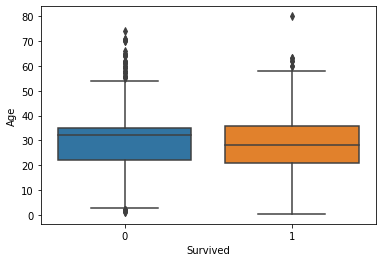

In [341]:
sns.boxplot(x= 'Survived', y = 'Age', data= titanic_train )

In [342]:
titanic_train[titanic_train['Age'] > 60].sum()['Survived']

5

In [343]:
titanic_train['Senior Citizen'] = titanic_train['Age'].apply(lambda x : "Yes" if x >=60 else "No")
titanic_test['Senior Citizen'] = titanic_test['Age'].apply(lambda x : "Yes" if x >=60 else "No")

In [345]:
titanic_train['Pclass'] = titanic_train['Pclass'].map({1 : 'First', 2 : 'Second', 3 : 'Third'})
titanic_test['Pclass'] = titanic_test['Pclass'].map({1 : 'First', 2 : 'Second', 3 : 'Third'})

In [346]:
titanic_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Name_Title,Family,Alone,have_SibSp,have_Parch,Family Info,Senior Citizen
0,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr,23,1,No,Yes,No,Small Family,No
1,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs,51,1,No,Yes,No,Small Family,No
2,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss,22,0,Yes,No,No,Small Family,No


In [347]:
titanic_train.drop(['Name','Cabin'], axis=1, inplace= True)

In [348]:
titanic_test.drop(['Name','Cabin'], axis=1, inplace= True)

## Preprocessing

In [349]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    object 
 2   Sex             891 non-null    object 
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Embarked        891 non-null    object 
 8   Title           891 non-null    object 
 9   Name_Title      891 non-null    int64  
 10  Family          891 non-null    int64  
 11  Alone           891 non-null    object 
 12  have_SibSp      891 non-null    object 
 13  have_Parch      891 non-null    object 
 14  Family Info     891 non-null    object 
 15  Senior Citizen  891 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 111.5+ KB


In [350]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    object 
 1   Sex             418 non-null    object 
 2   Age             418 non-null    float64
 3   SibSp           418 non-null    int64  
 4   Parch           418 non-null    int64  
 5   Fare            418 non-null    float64
 6   Embarked        418 non-null    object 
 7   Title           418 non-null    object 
 8   Name_Title      418 non-null    int64  
 9   Family          418 non-null    float64
 10  Alone           418 non-null    object 
 11  have_SibSp      418 non-null    object 
 12  have_Parch      418 non-null    object 
 13  Family Info     418 non-null    object 
 14  Senior Citizen  418 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 49.1+ KB


### Creating Family Info Feature

In [353]:
X_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']
X_test = titanic_test

In [358]:
X_train['train'] = 1
X_test['train'] = 0

In [359]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_Title,Family,Alone,have_SibSp,have_Parch,Family Info,Senior Citizen,train
0,Third,male,22.0,1,0,7.2500,S,Mr,23,1,No,Yes,No,Small Family,No,1
1,First,female,38.0,1,0,71.2833,C,Mrs,51,1,No,Yes,No,Small Family,No,1
2,Third,female,26.0,0,0,7.9250,S,Miss,22,0,Yes,No,No,Small Family,No,1


In [360]:
X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_Title,Family,Alone,have_SibSp,have_Parch,Family Info,Senior Citizen,train
0,Third,male,34.5,0,0,7.8292,Q,Mr,16,0.0,Yes,No,No,Small Family,No,0
1,Third,female,47.0,1,0,7.0000,S,Mrs,32,1.0,No,Yes,No,Small Family,No,0
2,Second,male,62.0,0,0,9.6875,Q,Mr,25,0.0,Yes,No,No,Small Family,Yes,0


In [361]:
combined = pd.concat([X_train, X_test])

In [363]:
df = pd.get_dummies(combined['Family Info'])

In [364]:
combined = pd.concat([combined, df], axis=1)

In [371]:
X_train = combined[combined['train'] == 1].copy()
X_test = combined[combined['train'] == 0].copy()
X_train.drop('train', axis=1, inplace =True)
X_test.drop('train', axis=1, inplace =True)

In [372]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_Title,Family,...,Rice,Richards,Robins,Ryerson,Sage,Samaan,Skoog,Small Family,Vande,West
0,Third,male,22.0,1,0,7.2500,S,Mr,23,1.0,...,0,0,0,0,0,0,0,1,0,0
1,First,female,38.0,1,0,71.2833,C,Mrs,51,1.0,...,0,0,0,0,0,0,0,1,0,0
2,Third,female,26.0,0,0,7.9250,S,Miss,22,0.0,...,0,0,0,0,0,0,0,1,0,0


In [373]:
X_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Name_Title,Family,...,Rice,Richards,Robins,Ryerson,Sage,Samaan,Skoog,Small Family,Vande,West
0,Third,male,34.5,0,0,7.8292,Q,Mr,16,0.0,...,0,0,0,0,0,0,0,1,0,0
1,Third,female,47.0,1,0,7.0000,S,Mrs,32,1.0,...,0,0,0,0,0,0,0,1,0,0
2,Second,male,62.0,0,0,9.6875,Q,Mr,25,0.0,...,0,0,0,0,0,0,0,1,0,0


In [374]:
X_train.drop('Family Info', axis=1, inplace= True)
X_test.drop('Family Info', axis=1, inplace= True)

#### Other Features

In [375]:
X_train.select_dtypes(['object']).columns

Index(['Pclass', 'Sex', 'Embarked', 'Title', 'Alone', 'have_SibSp',
       'have_Parch', 'Senior Citizen'],
      dtype='object')

In [376]:
features_train = pd.get_dummies(X_train[['Pclass', 'Sex', 'Embarked', 'Title', 'Alone', 'have_SibSp',
                                         'have_Parch','Senior Citizen']], drop_first=True)
features_test = pd.get_dummies(X_test[['Pclass', 'Sex', 'Embarked', 'Title', 'Alone', 'have_SibSp',
                                         'have_Parch', 'Senior Citizen']], drop_first=True)

In [377]:
X_train = pd.concat([X_train.drop(['Pclass', 'Sex', 'Embarked', 'Title', 'Alone', 'have_SibSp',
                                         'have_Parch', 'Senior Citizen'], axis=1), features_train], axis=1)
X_test = pd.concat([X_test.drop(['Pclass', 'Sex', 'Embarked', 'Title', 'Alone', 'have_SibSp',
                                         'have_Parch', 'Senior Citizen'], axis=1), features_test], axis=1)

In [379]:
X_train.head(3)

,Age,SibSp,Parch,Fare,Name_Title,Family,Allison,Andersson,Asplund,Backstrom,...,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Alone_Yes,have_SibSp_Yes,have_Parch_Yes,Senior Citizen_Yes
0,22.0,1,0,7.2500,23,1.0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1,38.0,1,0,71.2833,51,1.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,22,0.0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [380]:
X_test.head(3)

,Age,SibSp,Parch,Fare,Name_Title,Family,Allison,Andersson,Asplund,Backstrom,...,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Alone_Yes,have_SibSp_Yes,have_Parch_Yes,Senior Citizen_Yes
0,34.5,0,0,7.8292,16,0.0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
1,47.0,1,0,7.0000,32,1.0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,62.0,0,0,9.6875,25,0.0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1


In [381]:
from sklearn.preprocessing import MinMaxScaler

In [382]:
scaler = MinMaxScaler()

In [383]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [393]:
y_train = y_train.values

In [394]:
X_train.shape

(891, 57)

In [395]:
X_test.shape

(418, 57)

In [396]:
y_train.shape

(891,)

## Random Forest

In [388]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [399]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [400]:
random_forest_grid = GridSearchCV(estimator= RandomForestClassifier(), param_grid= random_grid, n_jobs= -1, cv= 5, verbose= 5 )

In [404]:
rand_clf = RandomForestClassifier(n_estimators= 2000)

In [405]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [406]:
predict = rand_clf.predict(X_test)

In [408]:
submission['Survived'] = predict

In [409]:
submission.to_csv('New Random Forest.txt', index= False)